# Assignment 3
### Due 9/21. Do four of five.

In [166]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
    - `GeneralHealthCondition` ; `HowOftenDrankMilkAge1835`
- Compute a contingency table for your categorical $X$ and $Y$
    - See code below.
- Discuss any interesting patterns (or lack of one) that you observe
    - At first I noticed that people of excellent health drink milk between once per week and more than once per day (good for a milk drinker like myself); however, after studying the table further, I realized that the proportion of milk drinkers is roughly the same for every health category. These data show that ~70% of the population drinks milk between once a week and more than once a day between the ages of 18-35. Unfortunately; however, there does not seem to be a pattern between milk drinking and various health outcomes. With these data, we cannot yet disprove the null hypothesis that milk drinkers have better health conditions.

In [167]:
# Load Data
nhanes = pd.read_csv("nhanes_data_17_18.csv")
nhanes.head()
# Columns: HowHealthyIsTheDiet; HowOftenDrankMilkAge1835; GeneralHealthCondition

C:\Users\eca4zm\AppData\Local\Temp\ipykernel_17792\3986871803.py:2: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv("nhanes_data_17_18.csv")


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
# Missing Value Investigation
nhanes['GeneralHealthCondition_na'] = nhanes['GeneralHealthCondition'].isna()
print(f'Proportion of NA Values for General Health Condition: {(nhanes['GeneralHealthCondition_na'].sum()/len(nhanes['GeneralHealthCondition_na']))*100:,.2f}%')
nhanes['HowOftenDrankMilkAge1835_na'] = nhanes['HowOftenDrankMilkAge1835'].isna()
print(f'Proportion of NA Values for Milk Drinkers 18-35 is {(nhanes['HowOftenDrankMilkAge1835_na'].sum()/len(nhanes['HowOftenDrankMilkAge1835_na']))*100:,.2f}%')

Proportion of NA Values for General Health Condition: 28.71%
Proportion of NA Values for Milk Drinkers 18-35 is 54.17%


In [169]:
# CrossTab Analysis of NA Health Condition versus how often they drink milk
pd.crosstab(nhanes['GeneralHealthCondition_na'], nhanes['HowOftenDrankMilkAge1835'], normalize='columns')\
    .style.background_gradient(
        cmap='Blues', 
        vmin=0, vmax=1
    ).format("{:.2f}")

# Generally, the proportion of missing General_Health_Condition is consistent aross various levels of milk drinkers. 

HowOftenDrankMilkAge1835,Never,Often-once a day or more,Rarely-less than once a week,Sometimes-once a week or more but less than once a day,Varied
GeneralHealthCondition_na,,,,,
False,0.87,0.92,0.94,0.94,0.93
True,0.13,0.08,0.06,0.06,0.07


In [170]:
# Contingency Table of General Health Versus How Often 18-35 year olds drank milk
contingency = pd.crosstab(nhanes['HowOftenDrankMilkAge1835'],nhanes['GeneralHealthCondition'], normalize='columns')
contingency = contingency[['Excellent', 'Very good', 'Good' , 'Fair or', "Poor?"]]
contingency.reset_index(inplace=True)

contingency["HowOftenDrankMilkAge1835"] = pd.Categorical(contingency["HowOftenDrankMilkAge1835"], 
                                                         categories=['Varied', 'Never', "Rarely-less than once a week",
                                                                     'Sometimes-once a week or more but less than once a day', 
                                                                     'Often-once a day or more'], 
                                                         ordered=True)
contingency.sort_values(by='Excellent', inplace=True)
contingency.style.background_gradient(
    cmap = 'Blues',
    vmin = 0, vmax = 1
)
    # It appears that people who drink milk often have good health outcomes!
    # But it also appears that the proportion of milk drinkers for people across the GeneralHealth spectrum is relatively equal. 

GeneralHealthCondition,HowOftenDrankMilkAge1835,Excellent,Very good,Good,Fair or,Poor?
4,Varied,0.012658,0.008226,0.010610,0.015228,0.009091
0,Never,0.034810,0.032902,0.040451,0.055838,0.054545
2,Rarely-less than once a week,0.161392,0.177438,0.199602,0.181472,0.172727
3,Sometimes-once a week or more but less than once a day,0.338608,0.410106,0.393899,0.371827,0.309091
1,Often-once a day or more,0.452532,0.371328,0.355438,0.375635,0.454545


## 2. 
- Open the NHANES dataset
    - Read in above.
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
    - `ofMealsFromFastGoodOrPizzaPlace` & `GeneralHealthCondition`
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
    - See code below.
- Discuss any interesting patterns (or lack of one) that you observe
    - I expected to see a more signifigant correlation between the number of times one at fast-food pizza per week and the general health conditions. Both the KDE and ECDF plots, however, did not show that people of better health condition ate signifigantly less fast food. The grouped statistics did prove useful as the "Excellent" and "Very Good" Health Condition groups did have a signicantly lower mean number of weekly fast food consumption than the other (worse) conditions. 

In [171]:
nhanes['OfMealsFromFastFoodOrPizzaPlace_na'] = nhanes['OfMealsFromFastFoodOrPizzaPlace'].isna()
na = nhanes['OfMealsFromFastFoodOrPizzaPlace_na'].sum()/len(nhanes['OfMealsFromFastFoodOrPizzaPlace'])
print(f'Proportion of NA Values for # of meals from fast food or pizza place: {na*100:,.2f}%')
print(f'Proportion of NA Values for General Health Condition: {(nhanes['GeneralHealthCondition_na'].sum()/len(nhanes['GeneralHealthCondition_na']))*100:,.2f}%')


Proportion of NA Values for # of meals from fast food or pizza place: 22.97%
Proportion of NA Values for General Health Condition: 28.71%


In [172]:
# Lets look at NA values for specific health conditions
crosstab = pd.crosstab(nhanes['OfMealsFromFastFoodOrPizzaPlace_na'], nhanes['GeneralHealthCondition'], normalize='columns')
print("\033[1mCrosstab for nhanes General Health Condition vs. Fast Food NA: \033[0m")
crosstab.style.background_gradient(cmap = 'Blues', 
                                   vmin = 0, vmax = 1).format("{:.2f}")
    # Based on this crosstab table, the missing fast-food data is of relatively equal proportions for every health condition, which is good. 

Crosstab for nhanes General Health Condition vs. Fast Food NA: 


GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
OfMealsFromFastFoodOrPizzaPlace_na,,,,,
False,0.78,0.74,0.79,0.76,0.81
True,0.22,0.26,0.21,0.24,0.19


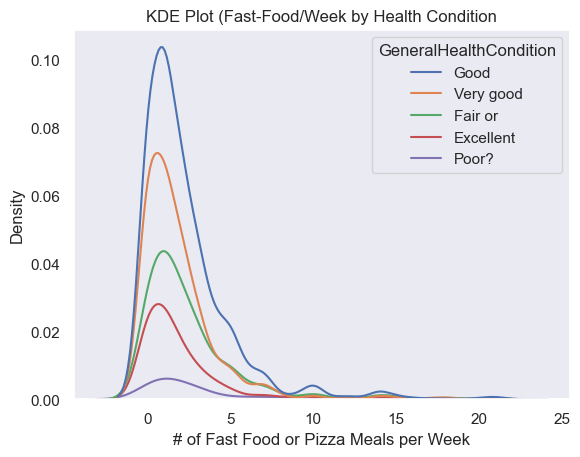

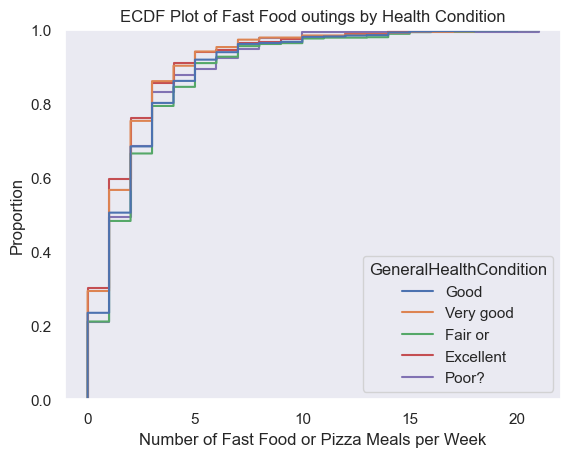

                       OfMealsFromFastFoodOrPizzaPlace                      \
                                                 count      mean       std   
GeneralHealthCondition                                                       
Excellent                                        480.0  1.856250  2.476226   
Fair or                                          871.0  2.412170  2.874588   
Good                                            1930.0  2.264249  2.736504   
Poor?                                            130.0  2.276923  2.739364   
Very good                                       1247.0  1.894948  2.543559   

                                                                    
                                 min           25%  50%  75%   max  
GeneralHealthCondition                                              
Excellent               5.397605e-79  5.397605e-79  1.0  2.0  17.0  
Fair or                 5.397605e-79  1.000000e+00  2.0  3.0  21.0  
Good                    5.3976

In [173]:
# Kernel Density Estimate Graph
cleaned = nhanes[nhanes['OfMealsFromFastFoodOrPizzaPlace'] < 50] # Removing the crazy high outliers
conditions = cleaned['GeneralHealthCondition'].unique()
sns.kdeplot(data = cleaned, 
            x = 'OfMealsFromFastFoodOrPizzaPlace', 
            hue = 'GeneralHealthCondition'
            )
plt.xlabel('# of Fast Food or Pizza Meals per Week')
plt.title('KDE Plot (Fast-Food/Week by Health Condition')
plt.show()

# Suprisingly, the plot fails to show that people who eat from fast food and pizza restaurants more frequently suffer from worse health conditions.

# ECDF Plot
sns.ecdfplot(data = cleaned, 
             x = 'OfMealsFromFastFoodOrPizzaPlace', 
             hue = 'GeneralHealthCondition', 
             )
plt.xlabel('Number of Fast Food or Pizza Meals per Week')
plt.title('ECDF Plot of Fast Food outings by Health Condition')
plt.show()

# This ECDF plot also fails to prove that there is any difference in health conditions for people who eat at fast food restaurents. 

# Descriptive Statistics
print(cleaned.loc[:, ['GeneralHealthCondition', 'OfMealsFromFastFoodOrPizzaPlace']].groupby('GeneralHealthCondition').describe())

# While it was hard to infer much from the graphs, the grouped descritive statistics show that the mean number of Fast-Food/Pizza meals
    # per week is signifigantly lower for people of "Excellent" and "Very Good" health conditions.  

## 3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

The Local Constant Least Squares Regression (LCLS) is 
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$


**SOLUTION**: To get there, we take the derivative of the MSE with respect to y(z) and set equal to zero... Lets let $ W = \frac{1}{h}k(\frac{z-x_i}{h}) $. For ease of writing in Latex, I am going to use $ y_z = \hat{y}(z) $

$$
\frac{d\hat{y}(z)}{dMSE} = \sum_{i=1}^N W \cdot -2(y_i - y_z) = 0
$$
$$
0 = \sum_{i=1}^N -2Wy_i + 2Wy_z
$$
Now we pull the constants out and divide by 2...
$$
0 = -\sum_{i=1}^N Wy_i + y_z \sum_{i=i}^N W
$$
$$
\sum_{i=1}^N Wy_i = y_z \sum_{i=i}^N W
$$
$$
\frac{\sum_{i=1}^N Wy_i}{\sum_{i=i}^N W} = y_z
$$
Remember W is equal to our kernel estimator... and BELOW IS THE *Local Constant Least Squares Regression!*
$$
\frac{\sum_{i=1}^N y_i\frac{1}{h}k(\frac{z-x_i}{h})}{\sum_{i=i}^N \frac{1}{h}k(\frac{z-x_i}{h})} = \hat{y}(z)
$$


## 4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

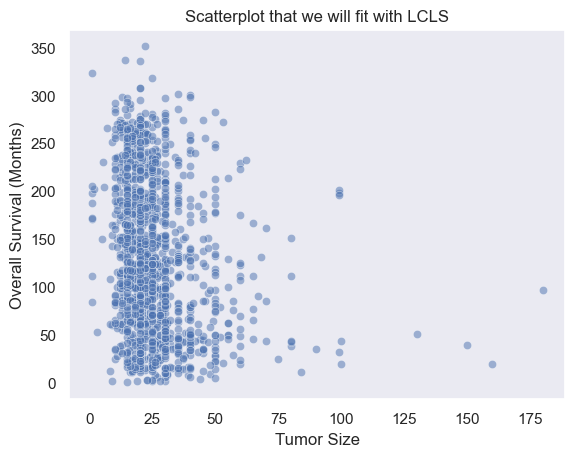

In [174]:
data = pd.read_csv('metabric.csv')
sns.scatterplot(data, x='Tumor Size', y='Overall Survival (Months)', alpha=.5)
plt.title('Scatterplot that we will fit with LCLS')
plt.show()

In [175]:
# LCLS FUNCTION:

def LCLS_Function(col_x, col_y):
    Y = col_y.to_numpy()
    X = col_x.to_numpy().reshape(-1,1)
    GRID = np.sort(np.unique(X)).reshape(1,-1)
    
    # Compute Silverman Bandwidth
    iqr = np.quantile(X, .75) - np.quantile(X, .25)
    h = 0.9 * min(np.std(X), iqr/1.34) * len(X)**(-0.2)

    # Compute U for the Kernel:
    u = (X-GRID) / h

    # Compute Kernel (Gaussian):
    kernel = 1/h * (1/np.sqrt((2*np.pi))) * np.exp(-.5*(u**2)) # This is the gaussian kernel

    # Compute Numerator and Denominator
    numerator = Y @ kernel
    demoninator = np.sum(kernel, axis=0)
    LCLS = numerator/(demoninator + 1e-12) # ensures no zero division error
    return LCLS, GRID

In [176]:
# FUNCTION CALL:
lcls, grid = LCLS_Function(data['Tumor Size'], data['Overall Survival (Months)'])

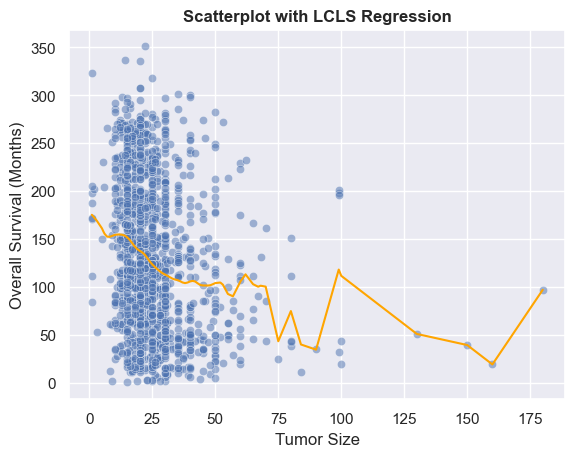

In [177]:
# Now we Plot:
sns.set_theme(style='darkgrid')
sns.scatterplot(data = data, 
                x = 'Tumor Size', 
                y = 'Overall Survival (Months)', 
                alpha = .5)
sns.lineplot(x = grid.ravel(), 
             y = lcls, 
             color = 'orange')
plt.title('Scatterplot with LCLS Regression', fontweight='bold')
plt.show()

## 5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$. *See answer below graphs*
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

In [178]:
college = pd.read_csv('college_completion.csv')
college = college[(college['med_sat_value'].notna()) &
                  (college['awards_per_value'].notna())]

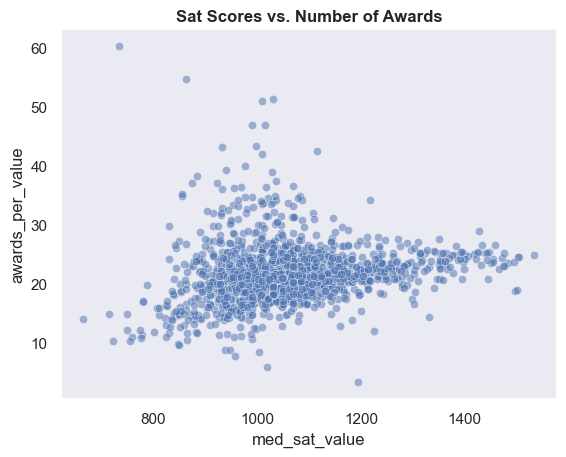

In [179]:
# Scatterplot:
x = college['med_sat_value']
y = college['awards_per_value']
sns.set_theme(style='dark')
sns.scatterplot(
    data = college, 
    x = x, 
    y = y, 
    alpha = .5
)
plt.title('Sat Scores vs. Number of Awards', fontweight= 'bold')
plt.show()

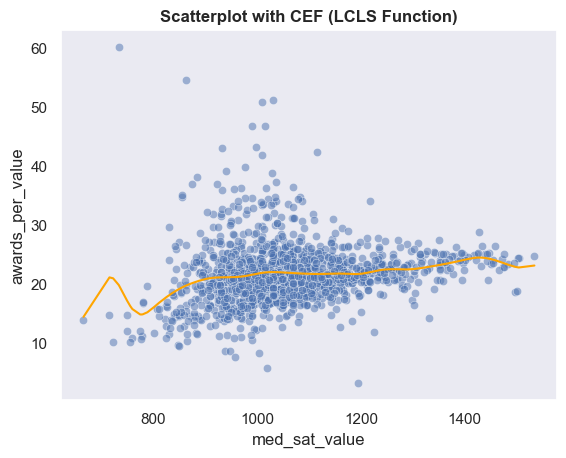

In [180]:
# CEF Plot: Use function from before to plot Conditional Expectation line!
lcls, grid = LCLS_Function(x, y)

sns.set_theme(style='dark')
sns.scatterplot(
    data = college, 
    x = x, 
    y = y, 
    alpha = .5)
sns.lineplot(
    x = grid.ravel(), 
    y = lcls, 
    color = 'orange'
)
plt.title('Scatterplot with CEF (LCLS Function)', fontweight='bold')
plt.show()

##### **Causality and Missing Variables?** 

In the scatterplot with the conditional expectation function above, we try to predict the number of awards per 100 students by using SAT Score as our predictor. If we were interested ONLY in purely ACADEMIC awards, then SAT Score would be a better *causal predictor*. However, since we are interested in ALL AWARDS, there are other variables that would help predict the number of awards students receive. To say that SAT Score is a causal predictor for ALL awards would be shortsighted as there are more ways to earn an award in college than just through academic performance. Additionally, many students who have a terrific GPA do not have as great an SAT score. By not including predictors such as # of clubs a student is involved in, average GPA, and number of students involved in research, we likely have an omited variable bias. 

Our model fits these data better for colleges with very high SAT score, which makes sense given that most of the awards to those schools are likely academic. The value of the residuals, however, is much greater where SAT_SCORE=~1000, which means there is more error in our prediction. This non-constant variance of the residuals is called heteroscedasticity and it is possible that there is an omitted variable that would help our analysis. 

##### **Can we still use the model to predict Y?**

Even if our Conditional Expectation Function/Model *does* suffer from omitted variables and lacks causal indentification, we can still use the model as there is **correlation** between SAT_Scores and number of awards that a school recieves per 100 students. Particularly for schools of high SAT Scores, this predictor appears to have a good fit to our awards data. 